<a href="https://colab.research.google.com/github/KeithChan01/cleaning-a-dataset/blob/main/Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Management wants to find out which employee will likely resign from the company within the next six months.

In [778]:
#import the excel sheet data and store it into a pandas DataFrames called 'data' 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

data = pd.read_excel('HR-Employee-Attrition(1).xlsx')


In [779]:
#perform descriptive analytics
data.describe(include ='all') #by default, only numerical columns will be shown. the 'include' parameter can be added to display all

,EmployeeNumber,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,Gender,MaritalStatus,MonthlyIncome,JobSatisfaction
count,1470.000000,1470.000000,1470,1470,1470.000000,1470,1470,1470,1470.000000,1354.000000
unique,NaN,NaN,2,3,NaN,6,2,4,NaN,NaN
top,NaN,NaN,No,Travel_Rarely,NaN,Life Sciences,Male,Married,NaN,NaN
freq,NaN,NaN,1233,1043,NaN,606,882,666,NaN,NaN
mean,735.500000,36.991837,NaN,NaN,9.192517,NaN,NaN,NaN,6502.931293,2.717134
std,424.496761,9.586548,NaN,NaN,8.106864,NaN,NaN,NaN,4707.956783,1.098498
min,1.000000,18.000000,NaN,NaN,1.000000,NaN,NaN,NaN,1009.000000,1.000000
25%,368.250000,30.000000,NaN,NaN,2.000000,NaN,NaN,NaN,2911.000000,2.000000
50%,735.500000,36.000000,NaN,NaN,7.000000,NaN,NaN,NaN,4919.000000,3.000000
75%,1102.750000,43.000000,NaN,NaN,14.000000,NaN,NaN,NaN,8379.000000,4.000000


In [780]:
#begin diagnostic analytics
#display first 5 rows of data to understand it and check for errors in datatype
print(data.head())
#display the number of rows and columns in the dataset
print(data.shape)
#display the names of the columns in the dataset
print(data.columns)
#display the data types of each column
print(data.dtypes)

   EmployeeNumber  Age Attrition     BusinessTravel  DistanceFromHome  \
0               1   41       Yes      Travel_Rarely                 1   
1               2   49        No  Travel_Frequently                 8   
2               3   37       Yes      Travel_Rarely                 2   
3               4   33        No  Travel_Frequently                 3   
4               5   27        No      Travel_Rarely                 2   

  EducationField  Gender MaritalStatus  MonthlyIncome  JobSatisfaction  
0  Life Sciences  Female        Single           5993              4.0  
1  Life Sciences    Male       Married           5130              2.0  
2          Other    Male        Single           2090              3.0  
3  Life Sciences  Female       Married           2909              3.0  
4        Medical    Male       Married           3468              2.0  
(1470, 10)
Index(['EmployeeNumber', 'Age', 'Attrition', 'BusinessTravel',
       'DistanceFromHome', 'EducationField', 'Gen

In [781]:
#making a copy of the original data to clean
data_cleaned = data.copy()
data_cleaned.head()

,EmployeeNumber,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,Gender,MaritalStatus,MonthlyIncome,JobSatisfaction
0,1,41,Yes,Travel_Rarely,1,Life Sciences,Female,Single,5993,4.0
1,2,49,No,Travel_Frequently,8,Life Sciences,Male,Married,5130,2.0
2,3,37,Yes,Travel_Rarely,2,Other,Male,Single,2090,3.0
3,4,33,No,Travel_Frequently,3,Life Sciences,Female,Married,2909,3.0
4,5,27,No,Travel_Rarely,2,Medical,Male,Married,3468,2.0


In [782]:
#use the value_counts() function to calculate the frequency of counts for each categorical column
print(data_cleaned['Attrition'].value_counts())
print("\nThere are a total of " + str(data_cleaned['Attrition'].value_counts().count()) + " unique categories")

print("\n")
print(data_cleaned['BusinessTravel'].value_counts())
print("\nThere are a total of " + str(data_cleaned['BusinessTravel'].value_counts().count()) + " unique categories")

print("\n")
print(data_cleaned['EducationField'].value_counts())
print("\nThere are a total of " + str(data_cleaned['EducationField'].value_counts().count()) + " unique categories")

print("\n")
print(data_cleaned['Gender'].value_counts())
print("\nThere are a total of " + str(data_cleaned['Gender'].value_counts().count()) + " unique categories")

print("\n")
print(data_cleaned['MaritalStatus'].value_counts())
print("\nThere are a total of " + str(data_cleaned['MaritalStatus'].value_counts().count()) + " unique categories")

No     1233
Yes     237
Name: Attrition, dtype: int64

There are a total of 2 unique categories


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

There are a total of 3 unique categories


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

There are a total of 6 unique categories


Male      882
Female    588
Name: Gender, dtype: int64

There are a total of 2 unique categories


Married         666
Single          470
Divorced        326
NOT_CAPTURED      8
Name: MaritalStatus, dtype: int64

There are a total of 4 unique categories


In [783]:
#using a non-visual plot to count the frequency of missing values for columns
print("Missing values count for each column")
print(data_cleaned.isnull().sum())
missing_prop = data_cleaned.isnull().sum()/len(data_cleaned)
print("\nMissing values proportion for each column")
print(missing_prop)

Missing values count for each column
EmployeeNumber        0
Age                   0
Attrition             0
BusinessTravel        0
DistanceFromHome      0
EducationField        0
Gender                0
MaritalStatus         0
MonthlyIncome         0
JobSatisfaction     116
dtype: int64

Missing values proportion for each column
EmployeeNumber      0.000000
Age                 0.000000
Attrition           0.000000
BusinessTravel      0.000000
DistanceFromHome    0.000000
EducationField      0.000000
Gender              0.000000
MaritalStatus       0.000000
MonthlyIncome       0.000000
JobSatisfaction     0.078912
dtype: float64


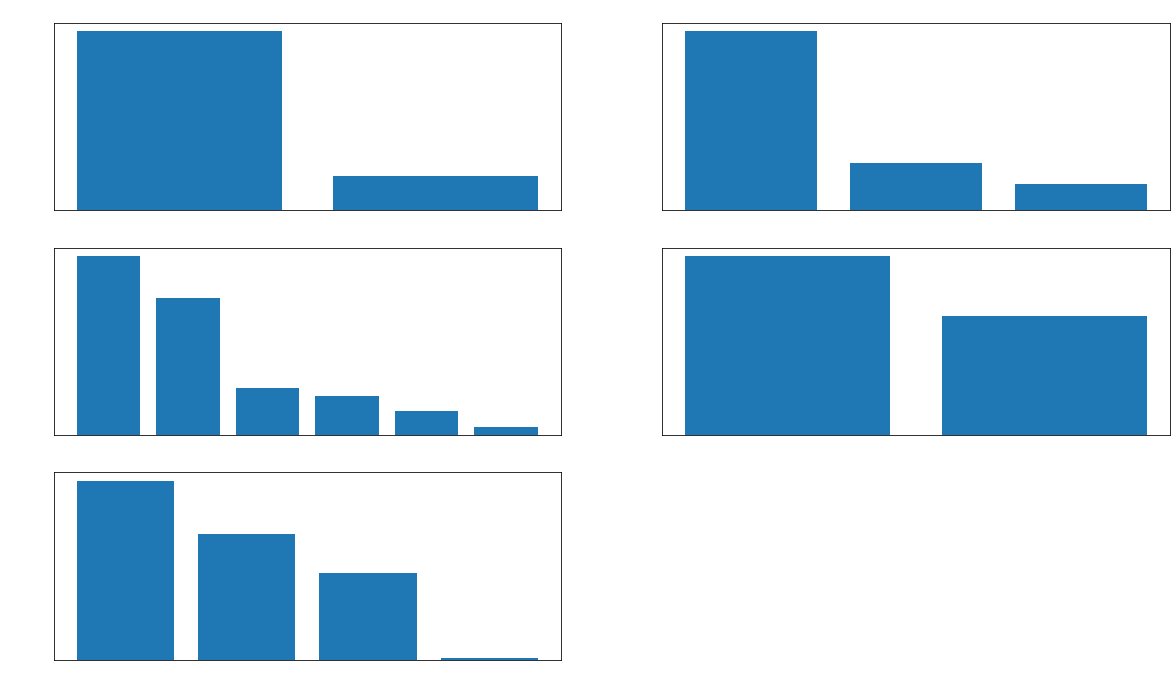

In [784]:
#as some columns have many values, frequency distribution bar plots can be used to visualise instead for categorical columns

plt.figure(figsize = (20,20))

plt.subplot(5,2,1)
plt.title("Frequency Distribution for Attrition")
plt.ylabel('Counts')
plt.bar(data_cleaned['Attrition'].value_counts().index, data_cleaned['Attrition'].value_counts().values)

plt.subplot(5,2,2)
plt.title('Frequency Distribution for BusinessTravel')
plt.ylabel('Counts')
plt.bar(data_cleaned['BusinessTravel'].value_counts().index, data_cleaned['BusinessTravel'].value_counts().values)

plt.subplot(5,2,3)
plt.title('Frequency Distribution for EducationField')
plt.ylabel('Counts')
plt.bar(data_cleaned['EducationField'].value_counts().index, data_cleaned['EducationField'].value_counts().values)

plt.subplot(5,2,4)
plt.title('Frequency Distribution for Gender')
plt.ylabel('Counts')
plt.bar(data_cleaned['Gender'].value_counts().index, data_cleaned['Gender'].value_counts().values)

plt.subplot(5,2,5)
plt.title('Frequency Distribution for MaritalStatus')
plt.ylabel('Counts')
plt.bar(data_cleaned['MaritalStatus'].value_counts().index, data_cleaned['MaritalStatus'].value_counts().values)

plt.show()

In [785]:
#checking if the formula is correct
data_cleaned['MaritalStatus']!= 'NOT_CAPTURED'

0       True
1       True
2       True
3       True
4       True
        ... 
1465    True
1466    True
1467    True
1468    True
1469    True
Name: MaritalStatus, Length: 1470, dtype: bool

In [786]:
#removing all rows with the 'NOT_CAPTURED' category in the 'MaritalStatus' column
data_cleaned = data.loc[data['MaritalStatus']!= 'NOT_CAPTURED']

In [787]:
#verifying that there are no longer any counts of 'NOT_CAPTURED' in the column
data_cleaned['MaritalStatus'].value_counts()

Married     666
Single      470
Divorced    326
Name: MaritalStatus, dtype: int64

In [788]:
#using a frequency count to count the frequency of missing values of columns
print("Missing values count for each column")
print(data_cleaned.isnull().sum())
missing_prop = data_cleaned.isnull().sum()/len(data_cleaned)
print("\nMissing values proportion for each column")
print(missing_prop)

Missing values count for each column
EmployeeNumber        0
Age                   0
Attrition             0
BusinessTravel        0
DistanceFromHome      0
EducationField        0
Gender                0
MaritalStatus         0
MonthlyIncome         0
JobSatisfaction     116
dtype: int64

Missing values proportion for each column
EmployeeNumber      0.000000
Age                 0.000000
Attrition           0.000000
BusinessTravel      0.000000
DistanceFromHome    0.000000
EducationField      0.000000
Gender              0.000000
MaritalStatus       0.000000
MonthlyIncome       0.000000
JobSatisfaction     0.079343
dtype: float64


<AxesSubplot:>

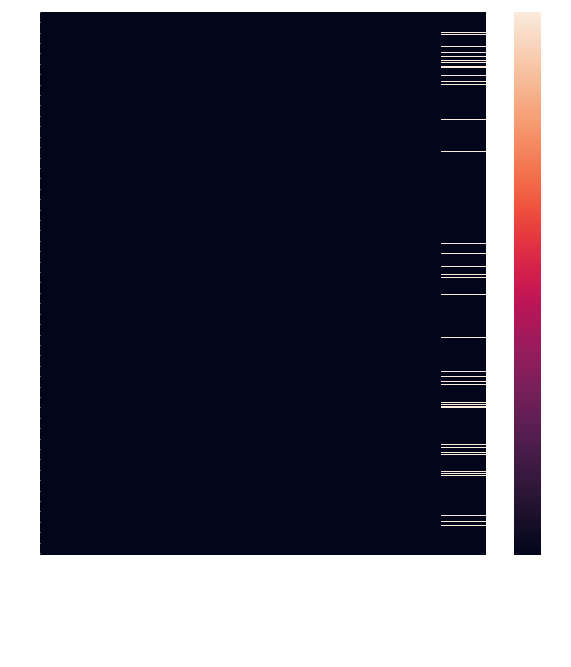

In [789]:
#using a visual plot to create a heat map for missing numerical values
import seaborn as sns
plt.figure(figsize = [10,10])
sns.heatmap(data_cleaned.isnull())

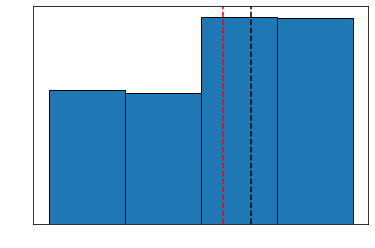

In [790]:
#as the JobSatisfaction column has more than 5% but lower than 20% of missing values, the missing values must be imputed
plt.hist(data['JobSatisfaction'], bins = 4, edgecolor = 'black')
plt.axvline(x = data['JobSatisfaction'].mean(), linestyle = 'dashed', color = 'red')
plt.axvline(x = data['JobSatisfaction'].median(), linestyle = 'dashed', color = 'black')
plt.show()

In [791]:
#from the histogram, 'JobSatisfaction' is not normally distributed and has many frequency counts of customers with scores of 2.5 and below. Hence, the mean will be pulled towards the left in the distribution, and median would be a better choice.
data_cleaned['JobSatisfaction'].fillna(value= data['JobSatisfaction'].median(), axis = 0, inplace = True)
data.loc[data['JobSatisfaction'].isna(),:]

c:\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,EmployeeNumber,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,Gender,MaritalStatus,MonthlyIncome,JobSatisfaction
55,56,33,No,Travel_Frequently,1,Life Sciences,Female,Single,13458,NaN
56,57,35,No,Travel_Frequently,18,Life Sciences,Male,Married,9069,NaN
61,62,38,No,Travel_Frequently,29,Life Sciences,Female,Single,2406,NaN
66,67,36,No,Travel_Frequently,11,Life Sciences,Male,Single,6499,NaN
68,69,35,No,Travel_Frequently,1,Medical,Male,Married,2194,NaN
...,...,...,...,...,...,...,...,...,...,...
1375,1376,32,Yes,Travel_Frequently,5,Life Sciences,Female,Single,2432,NaN
1377,1378,49,No,Travel_Frequently,2,Life Sciences,Male,Married,19161,NaN
1379,1380,27,Yes,Travel_Frequently,22,Human Resources,Female,Married,2863,NaN
1389,1390,31,No,Travel_Frequently,1,Life Sciences,Male,Married,5003,NaN


In [792]:
#verifying the imputation by checking to see if the missing values have been replaced with the median
data_cleaned.loc[[55,56,61,66,68]]

,EmployeeNumber,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,Gender,MaritalStatus,MonthlyIncome,JobSatisfaction
55,56,33,No,Travel_Frequently,1,Life Sciences,Female,Single,13458,3.0
56,57,35,No,Travel_Frequently,18,Life Sciences,Male,Married,9069,3.0
61,62,38,No,Travel_Frequently,29,Life Sciences,Female,Single,2406,3.0
66,67,36,No,Travel_Frequently,11,Life Sciences,Male,Single,6499,3.0
68,69,35,No,Travel_Frequently,1,Medical,Male,Married,2194,3.0


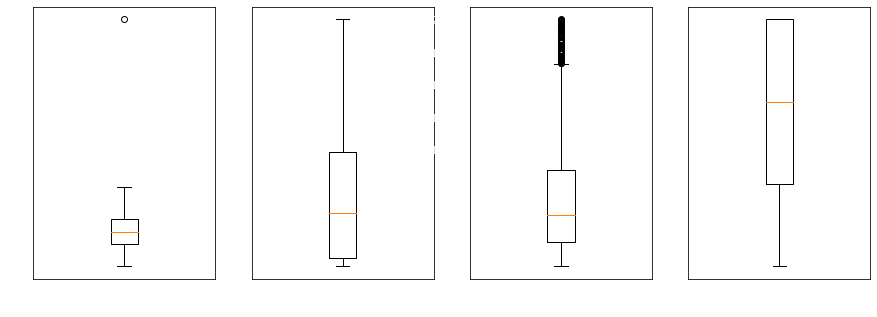

In [793]:
#using a boxplot to find numerical outliers
plt.figure(figsize = [15,5])

plt.subplot(1,4,1)
plt.xlabel('Age')
plt.boxplot(data_cleaned['Age'].dropna())

plt.subplot(1,4,2)
plt.xlabel('DistanceFromHome')
plt.boxplot(data_cleaned['DistanceFromHome'].dropna())

plt.subplot(1,4,3)
plt.xlabel('MonthlyIncome')
plt.boxplot(data_cleaned['MonthlyIncome'].dropna())

plt.subplot(1,4,4)
plt.xlabel('JobSatisfaction')
plt.boxplot(data_cleaned['JobSatisfaction'].dropna())

plt.show()

In [794]:
#computing the upper and lower fence values to remove the outlier
Q1 = data_cleaned['Age'].quantile(0.25)
Q3 = data_cleaned['Age'].quantile(0.75)
MEDIAN = data_cleaned['Age'].median()
IQR = Q3 - Q1
UpperFence = Q3 + 1.5*IQR
LowerFence = Q1 - 1.5*IQR
print("Q1={},Q3={}, MEDIAN={}, IQR={}, UpperFence={}, LowerFence={}".format(Q1,Q3,MEDIAN,IQR,UpperFence,LowerFence))

Q1=30.0,Q3=43.0, MEDIAN=36.0, IQR=13.0, UpperFence=62.5, LowerFence=10.5


In [795]:
#as an age above 140 is not realistic, the outlier in age should be removed.
(data_cleaned['Age']>=LowerFence) & (data_cleaned['Age']<=UpperFence)

0       True
1       True
2       True
3       True
4       True
        ... 
1465    True
1466    True
1467    True
1468    True
1469    True
Name: Age, Length: 1462, dtype: bool

In [796]:
#there are also outliers in the MonthlyIncome column, but a monthly salary of 20,000 is possible for high ranking employees such as CEO, CTO, CFO etc. Hence, the outliers should be kept as it may also be useful information for the model to learn from.
data_cleaned = data_cleaned.loc[(data_cleaned['Age']>=LowerFence) & (data_cleaned['Age']<=UpperFence),:]

In [797]:
#using the duplicated function to create a non-visual plot to find numerical duplicates
data_cleaned.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1461, dtype: bool

In [798]:
#counting the number of numerical duplicates
data_cleaned.duplicated().sum()

0

In [799]:
#checking on cleaned dataframe
data_cleaned.dtypes

EmployeeNumber        int64
Age                   int64
Attrition            object
BusinessTravel       object
DistanceFromHome      int64
EducationField       object
Gender               object
MaritalStatus        object
MonthlyIncome         int64
JobSatisfaction     float64
dtype: object

In [800]:
#changing 'JobSatisfaction' datatype from float64 to int64
data_cleaned = data_cleaned.astype({'JobSatisfaction':'int64'})

In [801]:
#final check on cleaned dataframe
data_cleaned.dtypes

EmployeeNumber       int64
Age                  int64
Attrition           object
BusinessTravel      object
DistanceFromHome     int64
EducationField      object
Gender              object
MaritalStatus       object
MonthlyIncome        int64
JobSatisfaction      int64
dtype: object

In [802]:
data_cleaned.to_excel('HR-Employee-Attrition-Cleaned.xlsx')

In [803]:
#extracting yes answers from the 'Attrition' column
att_yes = data_cleaned.loc[data_cleaned['Attrition'] == 'Yes',:]
att_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 1461
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeNumber    235 non-null    int64 
 1   Age               235 non-null    int64 
 2   Attrition         235 non-null    object
 3   BusinessTravel    235 non-null    object
 4   DistanceFromHome  235 non-null    int64 
 5   EducationField    235 non-null    object
 6   Gender            235 non-null    object
 7   MaritalStatus     235 non-null    object
 8   MonthlyIncome     235 non-null    int64 
 9   JobSatisfaction   235 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 20.2+ KB


In [804]:
#extracting no answers from the 'Attrition' column
att_no = data_cleaned.loc[data_cleaned['Attrition'] == 'No',:]
att_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226 entries, 1 to 1469
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeNumber    1226 non-null   int64 
 1   Age               1226 non-null   int64 
 2   Attrition         1226 non-null   object
 3   BusinessTravel    1226 non-null   object
 4   DistanceFromHome  1226 non-null   int64 
 5   EducationField    1226 non-null   object
 6   Gender            1226 non-null   object
 7   MaritalStatus     1226 non-null   object
 8   MonthlyIncome     1226 non-null   int64 
 9   JobSatisfaction   1226 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 105.4+ KB


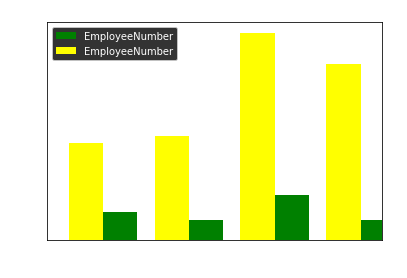

In [805]:
#using a bar plot to find any correlations between employee attrition and job satisfaction rating
width=0.4
att_yes.groupby('JobSatisfaction')['EmployeeNumber'].nunique().plot(kind='bar', color='green', width=width, position=0)
att_no.groupby('JobSatisfaction')['EmployeeNumber'].nunique().plot(kind='bar', color='yellow', width=width, position=1)
plt.legend(['Attrition','No Attrition'])
plt.title('Number of employees with Attrition based on Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Employees')
plt.xticks(rotation = 0)
plt.legend(facecolor='k')
plt.show()
#this bar plot shows that employees with low job satisfaction are more likely to have attrition and resign from the company

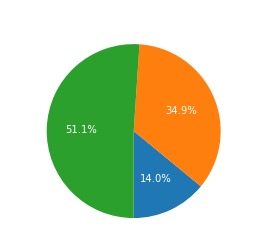

In [806]:
#using a pie chart plot to find any correlations between employee attrition and marital status
att_yes.groupby('MaritalStatus')['EmployeeNumber'].nunique().plot(kind ='pie', autopct ='%1.1f%%', ylabel = '', title = "Marital Status of employees with Attrition", startangle = 270)
plt.show()
#this pie chart shows that employees of single marital status are most likely to have attrition resign from the company